In [8]:
import numpy as np

# Read the theta_train.txt file
theta_train = np.loadtxt('theta_train.txt')

# Read the AFS_train.txt file
AFS_train = np.loadtxt('AFS_train.txt')

# Read the theta_test.txt file
theta_test = np.loadtxt('theta_test.txt')

# Read the AFS_test.txt file
AFS_test = np.loadtxt('AFS_test.txt')

# Display the data
print("Theta Train Data:")
print(theta_train)
print("\nAFS Train Data:")
print(AFS_train)
print("\nTheta Test Data:")
print(theta_test)
print("\nAFS Test Data:")
print(AFS_test)

Theta Train Data:
[41.4878 41.4878 41.4878 ... 38.2319 38.2319 38.2319]

AFS Train Data:
[[30. 14.  7. ...  0.  0.  0.]
 [37. 24. 19. ...  0.  0.  0.]
 [59. 10. 19. ...  0.  0.  0.]
 ...
 [43. 19.  7. ...  0.  0.  0.]
 [35. 15. 31. ...  0.  0.  0.]
 [26.  8. 26. ...  0.  0.  0.]]

Theta Test Data:
[ 0.881811  0.881811  0.881811  0.881811  0.881811  0.881811  0.881811
  0.881811  0.881811  0.881811 18.4724   18.4724   18.4724   18.4724
 18.4724   18.4724   18.4724   18.4724   18.4724   18.4724   11.7326
 11.7326   11.7326   11.7326   11.7326   11.7326   11.7326   11.7326
 11.7326   11.7326   29.4368   29.4368   29.4368   29.4368   29.4368
 29.4368   29.4368   29.4368   29.4368   29.4368   22.59     22.59
 22.59     22.59     22.59     22.59     22.59     22.59     22.59
 22.59     40.271    40.271    40.271    40.271    40.271    40.271
 40.271    40.271    40.271     8.29946   8.29946   8.29946   8.29946
  8.29946   8.29946   8.29946   8.29946   8.29946   8.29946   1.16439
  1.16439   

In [9]:
from sklearn.linear_model import LinearRegression

# Reshape theta_train to be a 2D array
theta_train_reshaped = theta_train.reshape(-1, 1)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(theta_train_reshaped, AFS_train)

# Display the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [[1.00103296]
 [0.49688889]
 [0.33035968]
 [0.25074802]
 [0.20450141]
 [0.16467121]
 [0.14331324]
 [0.13294539]
 [0.11220427]
 [0.10174289]
 [0.08933053]
 [0.08959317]
 [0.07241446]
 [0.07163207]
 [0.07009948]
 [0.0632143 ]
 [0.05950021]
 [0.0548557 ]
 [0.04768498]
 [0.04854862]
 [0.05047267]
 [0.04653192]
 [0.04441978]
 [0.03960405]
 [0.04110617]
 [0.03495669]
 [0.04166756]
 [0.03233711]
 [0.03343714]
 [0.0299438 ]
 [0.03103573]
 [0.03133977]
 [0.03060308]
 [0.02771358]
 [0.02680014]
 [0.02836665]
 [0.02830883]
 [0.02763556]
 [0.02592039]
 [0.02666204]
 [0.02368169]
 [0.0224776 ]
 [0.02067912]
 [0.02250817]
 [0.02240974]
 [0.0213385 ]
 [0.01912241]
 [0.02146413]
 [0.02028951]
 [0.01934276]
 [0.01862224]
 [0.01888516]
 [0.01662321]
 [0.01803783]
 [0.01661787]
 [0.01724351]
 [0.0162192 ]
 [0.01653759]
 [0.01675868]
 [0.01869605]
 [0.01654183]
 [0.01676626]
 [0.01677745]
 [0.01675945]
 [0.01579476]
 [0.01425399]
 [0.01540212]
 [0.01287662]
 [0.01285148]
 [0.01267536]
 [0.01

In [10]:
# training set
from sklearn.metrics import mean_squared_error

# Predict the AFS_train values using the model
AFS_train_pred = model.predict(theta_train_reshaped)

# Calculate the correlation coefficient
correlation = np.corrcoef(AFS_train.flatten(), AFS_train_pred.flatten())[0, 1]

# Print the correlation coefficient
print("Correlation Coefficient:", correlation)

Correlation Coefficient: 0.6379151626132943


In [11]:
# testing set
# Reshape theta_test to be a 2D array
theta_test_reshaped = theta_test.reshape(-1, 1)

# Predict the AFS_test values using the model
AFS_test_pred = model.predict(theta_test_reshaped)

# Calculate the mean squared error between the predicted and actual AFS_test
mse_test = mean_squared_error(AFS_test, AFS_test_pred)

# Print the mean squared error
print("Mean Squared Error on Test Set:", mse_test)

# Calculate the mean absolute error
mae_test = np.mean(np.abs(AFS_test - AFS_test_pred))

# Calculate the R² score
r2_score_test = model.score(theta_test_reshaped, AFS_test)

# Print all three metrics
print("Model Evaluation:")
print("Mean Squared Error:", mse_test)
print("Mean Absolute Error:", mae_test)
print("R² Score:", r2_score_test)

Mean Squared Error on Test Set: 17.70113055862944
Model Evaluation:
Mean Squared Error: 17.70113055862944
Mean Absolute Error: 1.3942741169321609
R² Score: 0.02512281790972823


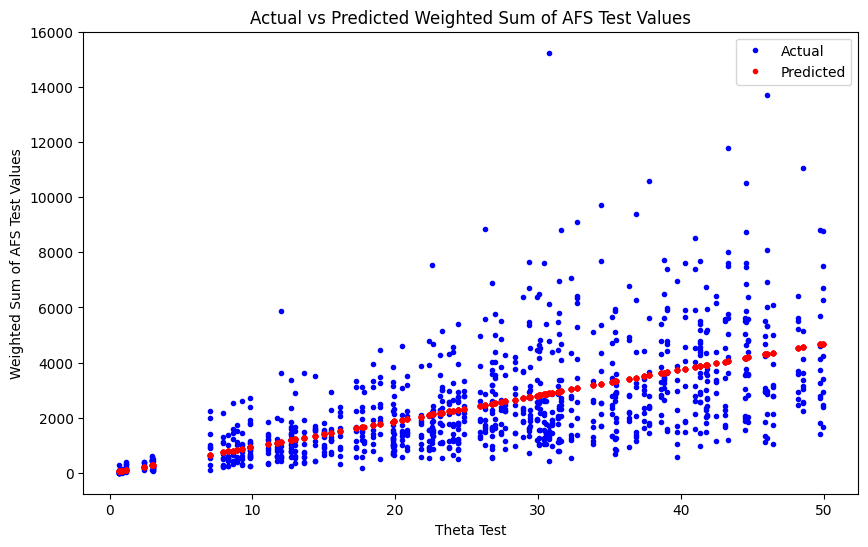

In [15]:
import matplotlib.pyplot as plt

# Calculate the weighted sum of AFS for each row
positions = np.arange(AFS_test.shape[1])
AFS_test_weighted_sum = (AFS_test * positions).sum(axis=1)
AFS_test_pred_weighted_sum = (AFS_test_pred * positions).sum(axis=1)

# Plot the actual vs predicted values for the testing set
plt.figure(figsize=(10, 6))
plt.plot(theta_test, AFS_test_weighted_sum, 'b.', label='Actual')
plt.plot(theta_test, AFS_test_pred_weighted_sum, 'r.', label='Predicted')
plt.xlabel('Theta Test')
plt.ylabel('Weighted Sum of AFS Test Values')
plt.title('Actual vs Predicted Weighted Sum of AFS Test Values')
plt.legend()
plt.show()